# Exercise Graph2
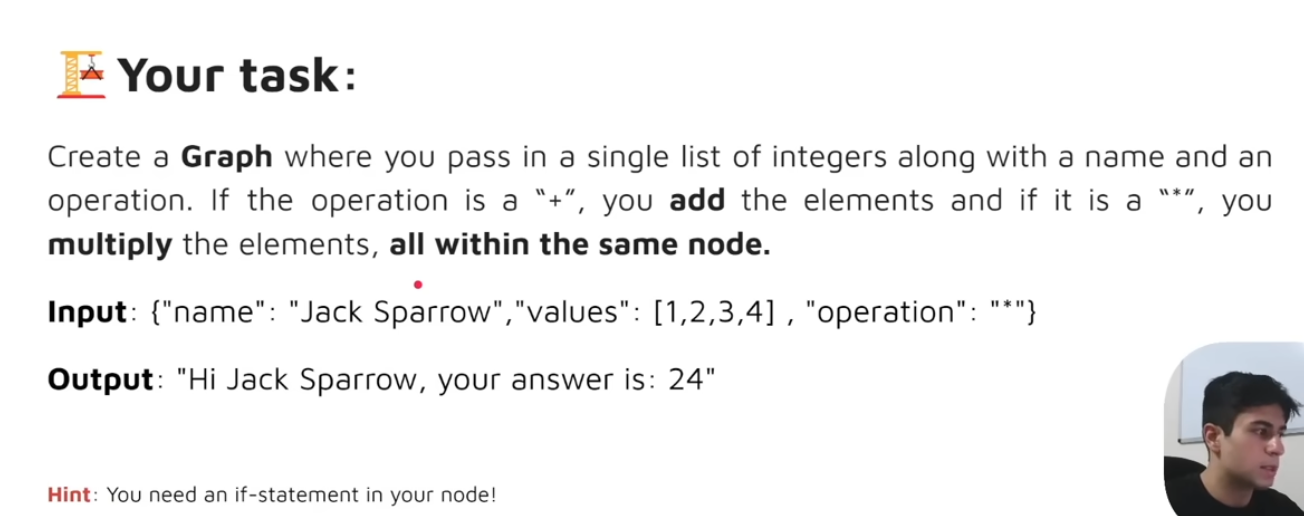

In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph
from math import prod
from dataclasses import dataclass

In [2]:
@dataclass
class AgentState:
    values:List
    name:str
    operation:str
    result:str

In [3]:
def process_values(state:AgentState):
    """ "Create a Graph where you pass in a single list of integers along with a name and an "| you we operation. 
    If the operation is a "+", you add the elements and if it is a multiply the elements, all within the same node. 
    e wou won Input: {"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "*"} 
    Output: "Hi Jack Sparrow, your answer is: 24" Hint: You need an if-statement in your node!

    Args:
        state (AgentState): AgentState
    """
    print(state)
    operation = state.operation
    if operation == "+":
        total = sum(state.values)
        state.result = f"Hi {state.name}, your answer is: {total}"
    elif operation == "*":
        product = prod(state.values)
        state.result = f"Hi {state.name}, your answer is: {product}"
    else:
        raise ValueError(f"Unsupported operation: {operation}")
    print(state)
    return state

In [4]:
graph=StateGraph(AgentState)
graph.add_node("processor",process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app=graph.compile()

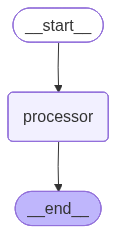

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
ans = app.invoke(AgentState(values=[1, 2, 3, 4, 5], name="Dave", operation="*", result=""))

AgentState(values=[1, 2, 3, 4, 5], name='Dave', operation='*', result='')
AgentState(values=[1, 2, 3, 4, 5], name='Dave', operation='*', result='Hi Dave, your answer is: 120')


In [7]:
ans = app.invoke(AgentState(values=[1, 2, 3, 4, 5], name="Dave", operation="+", result=""))

AgentState(values=[1, 2, 3, 4, 5], name='Dave', operation='+', result='')
AgentState(values=[1, 2, 3, 4, 5], name='Dave', operation='+', result='Hi Dave, your answer is: 15')
